<a href="https://colab.research.google.com/github/SriN08/HTML/blob/main/Copy_of_Face_to_Anime_with_AnimeGANv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

#### Getting an image to run through AnimeGANv2

* [Demis Hassabis](https://en.wikipedia.org/wiki/Demis_Hassabis), co-founder of DeepMind. From Twitter.

We'll save this image to our local storage and view a preview of it in our notebook.

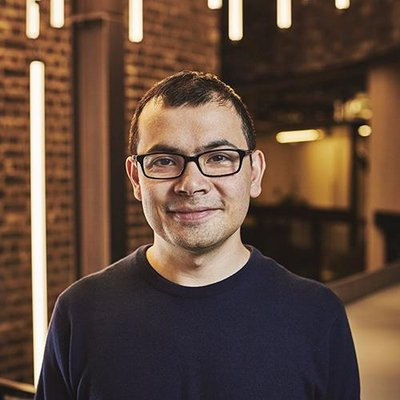

In [ ]:
import cv2
from urllib.request import urlretrieve
from google.colab.patches import cv2_imshow

# save the image to our local storage
urlretrieve('https://pbs.twimg.com/profile_images/691700243809718272/z7XZUARB_400x400.jpg', '/content/demis.jpg')

# display the image in the notebook
cv2_imshow(cv2.imread('/content/demis.jpg'))

# Using the Model (Running Inference)

First we load a model and define a function that will use the model to do the style transfer to convert our face to anime.

* `torch.hub.load` - Loads the pre-trained model checkpoints and the model code from github. We first load the `face_paint_512_v2` model weights.
* `to_animegan2` - The function we define that takes in the input file path, loads it with PIL and converts it to a tensor. It then runs this tensor through the model and converts the tensor output back to a PIL image. The PIL image is returned from the function.


In [1]:
import torch
from PIL import Image
from torchvision.transforms.functional import to_tensor, to_pil_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="face_paint_512_v2", device=device)
model.eval()

def to_animegan2(input_file):
  input_image = Image.open(input_file).convert('RGB')
  input_tensor = to_tensor(input_image).unsqueeze(0) * 2 - 1
  output = model(input_tensor.to(device)).cpu()[0]
  output = (output * 0.5 + 0.5).clip(0, 1)
  return to_pil_image(output)


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/bryandlee/animegan2-pytorch/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/face_paint_512_v2.pt" to /root/.cache/torch/hub/checkpoints/face_paint_512_v2.pt
100%|██████████| 8.20M/8.20M [00:00<00:00, 137MB/s]


Run the `to_animegan2` function on the photo of Demis that we downloaded previously, then display the output.

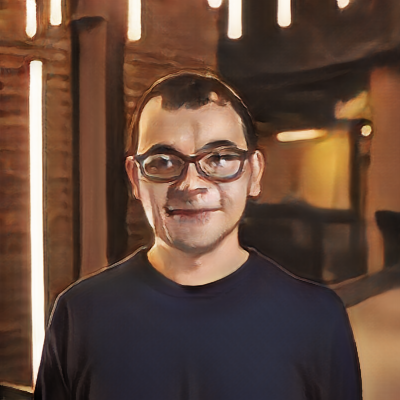

In [4]:
pil_image = to_animegan2('/content/demis.jpg')
display(pil_image)

Next, let's try a different model, the `celeba_distill` model. Let's load the model using `torch.hub.load` and run the original Demis image through our function and display the output.

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/celeba_distill.pt" to /root/.cache/torch/hub/checkpoints/celeba_distill.pt
100%|██████████| 8.20M/8.20M [00:00<00:00, 156MB/s]


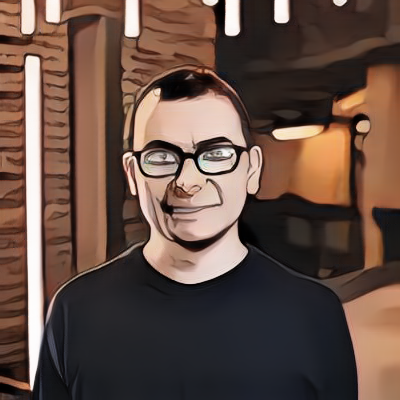

In [5]:
model = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="celeba_distill", device=device).eval()
display(to_animegan2('/content/demis.jpg'))

Now let's try the `parpika` model. Instead of directly outputting our output image to display, we instead save the image to our notebook/colab disk as `/content/demis_paprika.jpg`. We then display the image from disk.

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/paprika.pt" to /root/.cache/torch/hub/checkpoints/paprika.pt
100%|██████████| 8.20M/8.20M [00:00<00:00, 132MB/s]


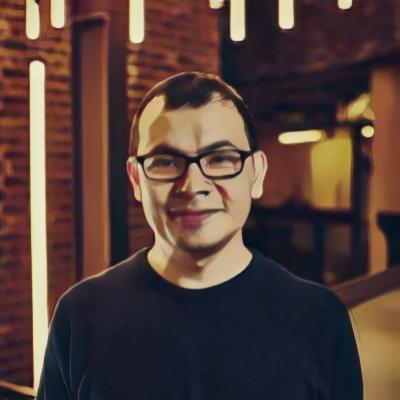

In [6]:
model = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="paprika", device=device).eval()
to_animegan2('/content/demis.jpg').save("/content/demis_paprika.jpg")
cv2_imshow(cv2.imread('/content/demis_paprika.jpg'))

Let's get another image, this time using the `torch.hub.download_url_to_file` function to download an image of the AI godfathers and save it to disk. We then display this original image.

100%|██████████| 44.8k/44.8k [00:00<00:00, 6.77MB/s]


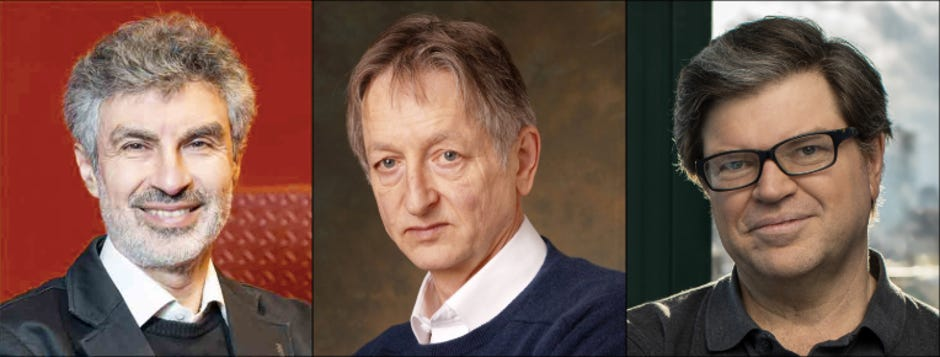

In [7]:
torch.hub.download_url_to_file('https://www.cnet.com/a/img/LxPnVvP4ONxWlQmXOI4j-9m6d90=/940x0/2019/03/27/c36a11ff-4029-4eb2-8ca9-72143ea8e596/screen-shot-2019-03-27-at-11-51-29-am.png', '/content/godfathers.jpg')
cv2_imshow(cv2.imread('/content/godfathers.jpg'))

Let's try running it with the paprika model and saving the output.

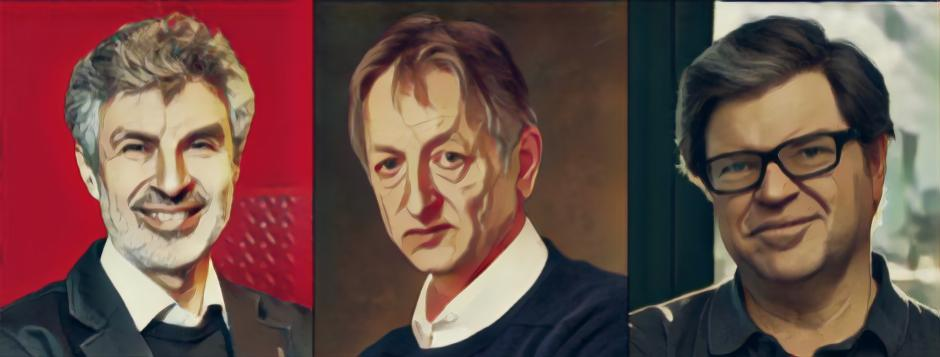

In [8]:
to_animegan2('/content/godfathers.jpg').save("/content/godfathers_paprika.jpg")
cv2_imshow(cv2.imread('/content/godfathers_paprika.jpg'))

We can connect to Google Drive with the following code. You can also click the `Files` icon on the left panel and click `Mount Drive` to mount your Google Drive.

The root of your Google Drive will be mounted to `/content/drive/My Drive/`. If you have problems mounting the drive, you can check out this [tutorial](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

You can move the output files which are saved in the `/content/` directory to your Google Drive.

In [ ]:
import shutil
shutil.move('/content/godfathers_paprika.jpg', '/content/drive/My Drive/godfathers_paprika.jpg')